In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/dataset_cleaned.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [3]:
udp_df = df[df['protocol_type']=='udp']
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [13]:
features = ['duration',"service","src_bytes","dst_bytes","wrong_fragment","count","num_compromised","srv_count","dst_host_srv_count","dst_host_diff_srv_rate"]
target = "result"

In [8]:
services = udp_df['service'].unique()
services

array(['private', 'domain_u', 'other', 'ntp_u', 'tftp_u'], dtype=object)

In [6]:
target_classes = np.unique(udp_df[target])
print(target_classes)

['multihop.' 'normal.' 'saint.' 'satan.' 'snmpgetattack.' 'snmpguess.'
 'teardrop.' 'udpstorm.']


In [11]:
# Replacing non-attack values with 0 and values with attack as 1

for i in range(len(target_classes)):
    if i == 1:
        udp_df = udp_df.replace(target_classes[i], 0)
    else:
        udp_df = udp_df.replace(target_classes[i], 1)
        
        
        
# Replacing service classes with integer values        
        
for i in range(5):
    udp_df.replace(services[i], i-2,inplace = True)

In [12]:
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,-2,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
1,0,udp,-2,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,-2,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,-2,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,-2,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1


[]

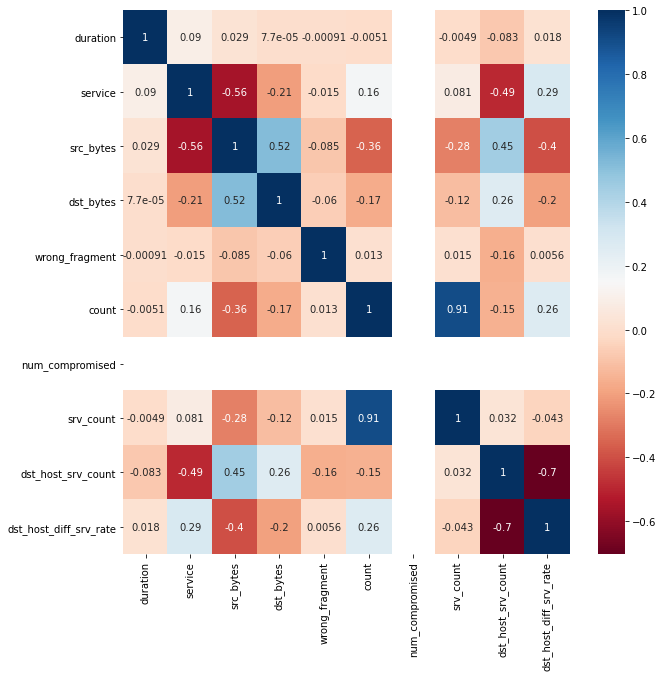

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(udp_df[features].corr(), annot=True,cmap="RdBu")
plt.plot()




# Evaluating most important features

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(udp_df[features],udp_df[target])
print(pd.Series(rfc.feature_importances_,index=features).sort_values(ascending=False))

dst_bytes                 0.318789
src_bytes                 0.176582
srv_count                 0.131861
dst_host_srv_count        0.130737
service                   0.109526
count                     0.101908
dst_host_diff_srv_rate    0.029241
duration                  0.000764
wrong_fragment            0.000590
num_compromised           0.000000
dtype: float64


# Machine Learning Model

In [16]:
# Roping in the most important features

X = udp_df[['dst_bytes','src_bytes','srv_count','dst_host_srv_count','service','count']]
y = udp_df[target]

In [17]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.3)

In [19]:
models = [('Logistic Regression',LogisticRegression(solver='liblinear')), 
          ('KNN Classifier',KNeighborsClassifier(n_neighbors=3)),
          ('MLP Classifer',MLPClassifier(alpha=0.005)),
          ('Decision Tree Classifier',DecisionTreeClassifier(random_state=3)),
          ('Random Forest Classfier',RandomForestClassifier(random_state=3))
         ]

scores=list()

In [20]:
for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    
    print('\n',name)
    print('---------------------------------')
    print("Accuracy of the model is: ", score)
    
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("*=============================================================*")


 Logistic Regression
---------------------------------
Accuracy of the model is:  73.91087255024341
Confusion Matrix:
 [[3846  986]
 [1104 2075]]
Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      4832
           1       0.68      0.65      0.67      3179

    accuracy                           0.74      8011
   macro avg       0.73      0.72      0.73      8011
weighted avg       0.74      0.74      0.74      8011

*=============================================================*

 KNN Classifier
---------------------------------
Accuracy of the model is:  73.14941954812133
Confusion Matrix:
 [[3917  915]
 [1236 1943]]
Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78      4832
           1       0.68      0.61      0.64      3179

    accuracy                           0.73      8011
   macro avg       0.72      0.71      0.71      8011
weighted avg       0.73      0

# Final Results

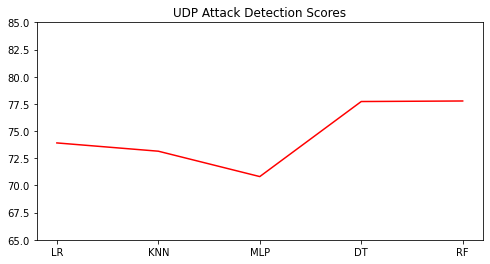

In [30]:
classifiers = ['LR','KNN','MLP','DT','RF']
plt.figure(figsize=(8,4))
plt.plot(classifiers,scores,color = 'r')
plt.title("UDP Attack Detection Scores")
plt.ylim(65,85)
plt.show()